# Adedoyin Simeon Adeyemi
### For: Kaggle Titanic Competition (Using ANN, version 1.1)
Date: 25th May,2019

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
train_data = pd.read_csv('train.csv',index_col='PassengerId')

In [5]:
test_data = pd.read_csv('test.csv',index_col='PassengerId')

In [6]:
gender_sub = pd.read_csv('gender_submission.csv')

In [7]:
train_data.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [8]:
test_data.head(5)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
gender_sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


## Exploring the Datasets

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [11]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


## Taking care of missing values

#### ================== Training Data ========================

In [12]:
train_data.count()

Survived    891
Pclass      891
Name        891
Sex         891
Age         714
SibSp       891
Parch       891
Ticket      891
Fare        891
Cabin       204
Embarked    889
dtype: int64

In [13]:
# Dropping Cabin because it contains too many Nulls to be filled, 
# and names and Ticket because they won't be so useful for the training

In [14]:
train_data.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)

In [15]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [16]:
# Filling missing values in Age with Mean() of Age column and rounding up age to 1dp
# Filling missing values of Embarked with Mode() of Embarked Column

In [17]:
train_data.Age.fillna(train_data.Age.mean(), axis=0, inplace=True)

In [18]:
train_data.Age = train_data.Age.apply(lambda x: np.round(x,1))

In [19]:
train_data.Embarked.fillna(train_data.Embarked.mode()[0], axis=0, inplace=True)

In [20]:
train_data.count()

Survived    891
Pclass      891
Sex         891
Age         891
SibSp       891
Parch       891
Fare        891
Embarked    891
dtype: int64

In [21]:
train_data.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C


#### ==================== Test Data =====================

In [22]:
test_data.head(2)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [23]:
test_data.count()

Pclass      418
Name        418
Sex         418
Age         332
SibSp       418
Parch       418
Ticket      418
Fare        417
Cabin        91
Embarked    418
dtype: int64

In [24]:
# Dropping irrelevant columns and Cabin column with too many missing data

In [25]:
test_data.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)

In [26]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,male,34.5,0,0,7.8292,Q
893,3,female,47.0,1,0,7.0000,S
894,2,male,62.0,0,0,9.6875,Q
895,3,male,27.0,0,0,8.6625,S
896,3,female,22.0,1,1,12.2875,S


In [27]:
test_data.count()

Pclass      418
Sex         418
Age         332
SibSp       418
Parch       418
Fare        417
Embarked    418
dtype: int64

In [28]:
# Filling missing values in Age and Fare with Mean() of Age and Mean() of Fare columns respectively 
# and rounding up age to 1dp

In [29]:
test_data.Age.fillna(test_data.Age.mean(), axis=0, inplace=True)

In [30]:
test_data.Fare.fillna(test_data.Fare.mean(), axis=0, inplace=True)

In [31]:
test_data.Age = test_data.Age.apply(lambda x: np.round(x,1))

In [32]:
test_data.count()

Pclass      418
Sex         418
Age         418
SibSp       418
Parch       418
Fare        418
Embarked    418
dtype: int64

# Exploratory Data Analysis, EDA (on Training dataset)

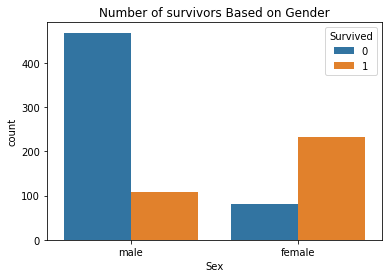

In [33]:
plt.title('Number of survivors Based on Gender')
sns.countplot(x="Sex",data=train_data,hue="Survived")

## Analysis:
From the above chart Most of the male passengers died while most of the female passengers survived.

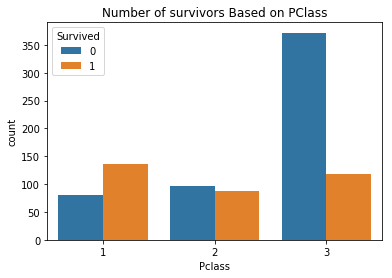

In [34]:
plt.title('Number of survivors Based on PClass')
sns.countplot(x="Pclass",data=train_data,hue="Survived")

## Analysis
Majority of the passengers who boarded 3rd Class died

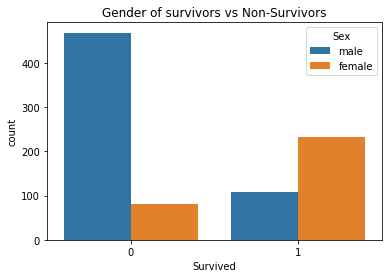

In [35]:
plt.title('Gender of survivors vs Non-Survivors')
sns.countplot(x="Survived",data=train_data,hue="Sex")

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


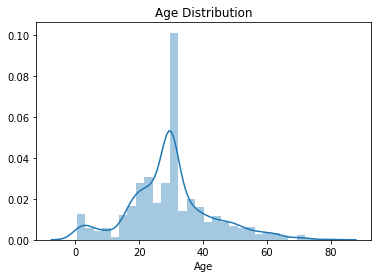

In [36]:
plt.title('Age Distribution')
sns.distplot(train_data.Age)

# Analysis:
Majority of the passengers are Youth 

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


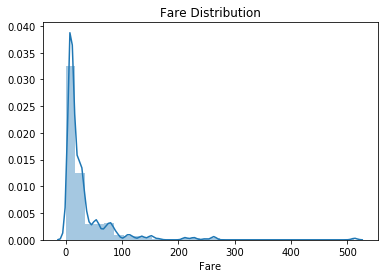

In [37]:
plt.title('Fare Distribution')
sns.distplot(train_data.Fare,bins=30)

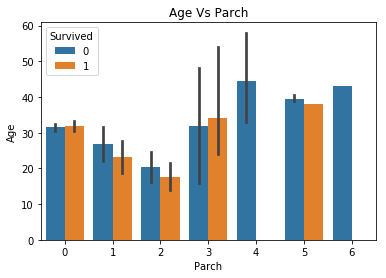

In [38]:
plt.title('Age Vs Parch')
sns.barplot(x='Parch', y='Age',data=train_data,hue='Survived')

## Analysis:
    * Everyone in Parch 4 and parch 6 containing only elderly people (>=40) did not survive
    * Almost half of the passengers in the remaining Parches, mostly youth (aged btw 18 and 40) survived

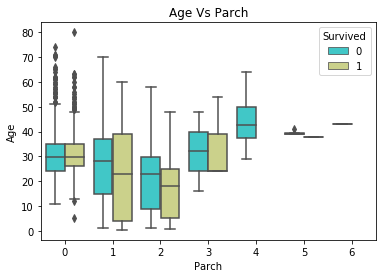

In [39]:
plt.title('Age Vs Parch')
sns.boxplot(x='Parch', y='Age',data=train_data,hue='Survived',palette='rainbow')

In [40]:
correlation = train_data.corr()

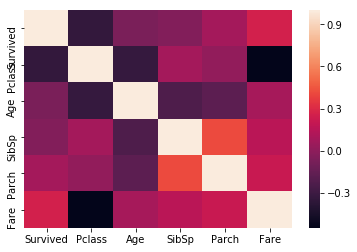

In [41]:
sns.heatmap(correlation)

# More Preprocessing: Encoding 
Encoding categorical independent variables, Pclass, Sex, SibSp, Parch and Embarked

In [42]:
from pandas import get_dummies

### =================== Encoding Training and Test dataset ====================

In [43]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [44]:
# Training Set Encoding
#pclass_train = get_dummies(train_data.Pclass)
gender_train = get_dummies(train_data.Sex)
#sibsp_train = get_dummies(train_data.SibSp)
#parch_train = get_dummies(train_data.Parch)
embarked_train = get_dummies(train_data.Embarked)

In [45]:
# Test Set Encoding
#pclass_test = get_dummies(test_data.Pclass)
gender_test = get_dummies(test_data.Sex)
#parch_test = get_dummies(test_data.Parch)
embarked_test = get_dummies(test_data.Embarked)

## ------------ Training Encoded-----------

In [46]:
#pclass_train.head(2)

In [47]:
gender_train.head(2)

,female,male
PassengerId,,
1,0,1
2,1,0


In [48]:
#parch_train.head(2)

In [49]:
embarked_train.head(2)

,C,Q,S
PassengerId,,,
1,0,0,1
2,1,0,0


## ------------ Test Encoded -----------

In [50]:
#pclass_test.head(2)

In [51]:
gender_test.head(2)

,female,male
PassengerId,,
892,0,1
893,1,0


In [52]:
#parch_test.head(2)

In [53]:
embarked_test.head(2)

,C,Q,S
PassengerId,,,
892,0,1,0
893,0,0,1


### =================== Removing First Column(s) to solve Multi-colinearity Problem ====================
To Solve the problem of Multicolinearity, There is need to drop one of the columns of the encoded 
variables since one determines the other(s)

In [54]:
# Training encoded variables
#pclass_train.drop(1, axis=1, inplace=True)
gender_train.drop('female', axis=1, inplace=True)
#sibsp_train.drop(0, axis=1, inplace=True)
#parch_train.drop(0, axis=1, inplace=True)
embarked_train.drop('C', axis=1, inplace=True)

In [55]:
# Test encoded variables
#pclass_test.drop(1, axis=1, inplace=True)
gender_test.drop('female', axis=1, inplace=True)
#sibsp_test.drop(0, axis=1, inplace=True)
#parch_test.drop(0, axis=1, inplace=True)
embarked_test.drop('C', axis=1, inplace=True)

### ====== Replacing the Original Variables with the encoded ones ===========

In [56]:
# Dropping original Columns
train_data.drop(['Sex','Embarked'],axis=1,inplace=True)
test_data.drop(['Sex','Embarked'],axis=1,inplace=True)

In [57]:
# Adding the Encoded Columns
train_data = pd.concat([train_data, gender_train, embarked_train], axis=1)
test_data = pd.concat([test_data, gender_test, embarked_test], axis=1)

In [58]:
train_data.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
PassengerId,,,,,,,,,
1,0,3,22.0,1,0,7.2500,1,0,1
2,1,1,38.0,1,0,71.2833,0,0,0
3,1,3,26.0,0,0,7.9250,0,0,1


In [59]:
test_data.head(3)

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
PassengerId,,,,,,,,
892,3,34.5,0,0,7.8292,1,1,0
893,3,47.0,1,0,7.0000,0,0,1
894,2,62.0,0,0,9.6875,1,1,0


In [60]:
#test_data.drop(9,axis=1,inplace=True)

In [61]:
#test_data.head(3)

# Splitting the Training data set into X (independent) and y (dependent) Variables

In [62]:
X = train_data.drop('Survived',axis=1)
y = train_data['Survived']

In [63]:
X.head(3)

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
PassengerId,,,,,,,,
1,3,22.0,1,0,7.2500,1,0,1
2,1,38.0,1,0,71.2833,0,0,0
3,3,26.0,0,0,7.9250,0,0,1


In [64]:
y.head(3)

PassengerId
1    0
2    1
3    1
Name: Survived, dtype: int64

# Scaling:
The Independent Variables X dataset to enable Models that depend on distance measurement for classfication to do well

In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
scale = StandardScaler()

In [67]:
scaled_x_train = scale.fit_transform(X)
scaled_test_set = scale.transform(test_data)

In [68]:
scaled_x_train = pd.DataFrame(data=scaled_x_train, index=X.index, columns=X.columns)
scaled_test_set = pd.DataFrame(data=scaled_test_set, index=test_data.index, columns=test_data.columns)

In [69]:
scaled_x_train.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
PassengerId,,,,,,,,
1,0.827377,-0.592500,0.432793,-0.473674,-0.502445,0.737695,-0.307562,0.615838
2,-1.566107,0.638777,0.432793,-0.473674,0.786845,-1.355574,-0.307562,-1.623803
3,0.827377,-0.284681,-0.474545,-0.473674,-0.488854,-1.355574,-0.307562,0.615838
4,-1.566107,0.407912,0.432793,-0.473674,0.420730,-1.355574,-0.307562,0.615838
5,0.827377,0.407912,-0.474545,-0.473674,-0.486337,0.737695,-0.307562,0.615838


In [70]:
scaled_test_set.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
PassengerId,,,,,,,,
892,0.827377,0.369435,-0.474545,-0.473674,-0.490783,0.737695,3.251373,-1.623803
893,0.827377,1.331370,0.432793,-0.473674,-0.507479,-1.355574,-0.307562,0.615838
894,-0.369365,2.485692,-0.474545,-0.473674,-0.453367,0.737695,3.251373,-1.623803
895,0.827377,-0.207726,-0.474545,-0.473674,-0.474005,0.737695,-0.307562,0.615838
896,0.827377,-0.592500,0.432793,0.767630,-0.401017,-1.355574,-0.307562,0.615838


##  ============ Temporary Evaluation with Train_Test_Split ===============

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_valid, y_train, y_valid = train_test_split(scaled_x_train, y, test_size=0.25, random_state=43)

# ---------------------------------------------
# Building ANN Models Here
# ---------------------------------------------

In [73]:
# Importing keras libraries and packages

In [74]:
import keras
from keras.models import Sequential
from keras.layers import Dense

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [75]:
#Initailizing the ANN
classifier = Sequential()

In [76]:
# Adding the input and the first hidden layer
classifier.add(Dense(units=5, activation='relu', kernel_initializer='uniform', input_shape=(8,)))

Instructions for updating:
Colocations handled automatically by placer.


In [77]:
# Adding the second hidden layer
classifier.add(Dense(units=5, activation='relu', kernel_initializer='uniform'))

In [78]:
# Adding the Third hidden layer
classifier.add(Dense(units=5, activation='relu', kernel_initializer='uniform'))

In [79]:
# Adding the output layer
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

In [80]:
# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [81]:
#Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size=10, epochs=100)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
668/668 [==============================] - 3s 4ms/step - loss: 0.6907 - acc: 0.6153
Epoch 2/100
668/668 [==============================] - 0s 213us/step - loss: 0.6826 - acc: 0.6198
Epoch 3/100
668/668 [==============================] - 0s 288us/step - loss: 0.6489 - acc: 0.6198
Epoch 4/100
668/668 [==============================] - 0s 247us/step - loss: 0.5644 - acc: 0.6826
Epoch 5/100
668/668 [==============================] - 0s 164us/step - loss: 0.4985 - acc: 0.8219
Epoch 6/100
668/668 [==============================] - 0s 187us/step - loss: 0.4632 - acc: 0.8174
Epoch 7/100
668/668 [==============================] - 0s 175us/step - loss: 0.4386 - acc: 0.8144
Epoch 8/100
668/668 [==============================] - 0s 186us/step - loss: 0.4247 - acc: 0.8129
Epoch 9/100
668/668 [==============================] - 0s 216us/step - loss: 0.4174 - acc: 0.8174
Epoch 10/100
668/668 [==============================] - 0s 195us/step - 

668/668 [==============================] - 0s 219us/step - loss: 0.3735 - acc: 0.8428
Epoch 81/100
668/668 [==============================] - 0s 150us/step - loss: 0.3726 - acc: 0.8368
Epoch 82/100
668/668 [==============================] - 0s 167us/step - loss: 0.3727 - acc: 0.8338
Epoch 83/100
668/668 [==============================] - 0s 145us/step - loss: 0.3735 - acc: 0.8413
Epoch 84/100
668/668 [==============================] - 0s 160us/step - loss: 0.3734 - acc: 0.8398
Epoch 85/100
668/668 [==============================] - 0s 142us/step - loss: 0.3723 - acc: 0.8398
Epoch 86/100
668/668 [==============================] - 0s 161us/step - loss: 0.3719 - acc: 0.8398
Epoch 87/100
668/668 [==============================] - 0s 150us/step - loss: 0.3719 - acc: 0.8398
Epoch 88/100
668/668 [==============================] - 0s 154us/step - loss: 0.3723 - acc: 0.8398
Epoch 89/100
668/668 [==============================] - 0s 159us/step - loss: 0.3716 - acc: 0.8398
Epoch 90/100
668/668 [=

In [82]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
import pydot

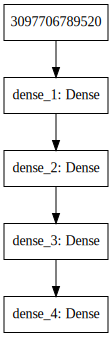

In [84]:
SVG(data=model_to_dot(classifier).create(prog='dot',format='svg'))

In [85]:
plot_model(model=classifier, to_file='ann_classifier_model.png')

In [120]:
y_pred = classifier.predict(X_valid)

In [87]:
y_pred = (y_pred > 0.5)

In [88]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [89]:
print(confusion_matrix(y_valid,y_pred))
print('\n')
print(classification_report(y_valid,y_pred))
print('\n')
print(accuracy_score(y_valid,y_pred))

[[120  15]
 [ 35  53]]


             precision    recall  f1-score   support

          0       0.77      0.89      0.83       135
          1       0.78      0.60      0.68        88

avg / total       0.78      0.78      0.77       223



0.7757847533632287


# ---------------------------------------------------------------------------------------
# ACTUAL MODEL TRAINING WITH GIVEN TEST DATA
# ---------------------------------------------------------------------------------------

### Initializations / Instantiations

In [90]:
#Initailizing the ANN
ann_classifier = Sequential()

In [91]:
# Adding the input and the first hidden layer
ann_classifier.add(Dense(units=5, activation='relu', kernel_initializer='uniform', input_shape=(8,)))

In [92]:
# Adding the second hidden layer
ann_classifier.add(Dense(units=5, activation='relu', kernel_initializer='uniform'))

In [93]:
# Adding the third hidden layer
ann_classifier.add(Dense(units=5, activation='relu', kernel_initializer='uniform'))

In [94]:
# Adding the output layer
ann_classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

In [95]:
# Compiling the ANN
ann_classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [96]:
#Fitting the ANN to the Training set
ann_classifier.fit(X_train, y_train, batch_size=10, epochs=200)

Epoch 1/200
668/668 [==============================] - 1s 875us/step - loss: 0.6909 - acc: 0.6168
Epoch 2/200
668/668 [==============================] - 0s 177us/step - loss: 0.6867 - acc: 0.6198
Epoch 3/200
668/668 [==============================] - 0s 211us/step - loss: 0.6830 - acc: 0.6198
Epoch 4/200
668/668 [==============================] - 0s 205us/step - loss: 0.6800 - acc: 0.6198
Epoch 5/200
668/668 [==============================] - 0s 199us/step - loss: 0.6774 - acc: 0.6198
Epoch 6/200
668/668 [==============================] - 0s 159us/step - loss: 0.6753 - acc: 0.6198
Epoch 7/200
668/668 [==============================] - 0s 190us/step - loss: 0.6735 - acc: 0.6198
Epoch 8/200
668/668 [==============================] - 0s 207us/step - loss: 0.6720 - acc: 0.6198
Epoch 9/200
668/668 [==============================] - 0s 178us/step - loss: 0.6706 - acc: 0.6198
Epoch 10/200
668/668 [==============================] - 0s 175us/step - loss: 0.6696 - acc: 0.6198
Epoch 11/200
668/66

668/668 [==============================] - 0s 201us/step - loss: 0.6642 - acc: 0.6198
Epoch 84/200
668/668 [==============================] - 0s 262us/step - loss: 0.6642 - acc: 0.6198
Epoch 85/200
668/668 [==============================] - 0s 245us/step - loss: 0.6643 - acc: 0.6198
Epoch 86/200
668/668 [==============================] - 0s 265us/step - loss: 0.6642 - acc: 0.6198
Epoch 87/200
668/668 [==============================] - 0s 270us/step - loss: 0.6642 - acc: 0.6198
Epoch 88/200
668/668 [==============================] - 0s 226us/step - loss: 0.6642 - acc: 0.6198
Epoch 89/200
668/668 [==============================] - 0s 209us/step - loss: 0.6642 - acc: 0.6198
Epoch 90/200
668/668 [==============================] - 0s 210us/step - loss: 0.6643 - acc: 0.6198
Epoch 91/200
668/668 [==============================] - 0s 210us/step - loss: 0.6642 - acc: 0.6198
Epoch 92/200
668/668 [==============================] - 0s 201us/step - loss: 0.6642 - acc: 0.6198
Epoch 93/200
668/668 [=

668/668 [==============================] - 0s 207us/step - loss: 0.6642 - acc: 0.6198
Epoch 165/200
668/668 [==============================] - 0s 260us/step - loss: 0.6642 - acc: 0.6198
Epoch 166/200
668/668 [==============================] - 0s 196us/step - loss: 0.6642 - acc: 0.6198
Epoch 167/200
668/668 [==============================] - 0s 198us/step - loss: 0.6643 - acc: 0.6198
Epoch 168/200
668/668 [==============================] - 0s 284us/step - loss: 0.6642 - acc: 0.6198
Epoch 169/200
668/668 [==============================] - 0s 192us/step - loss: 0.6642 - acc: 0.6198
Epoch 170/200
668/668 [==============================] - 0s 198us/step - loss: 0.6642 - acc: 0.6198
Epoch 171/200
668/668 [==============================] - 0s 189us/step - loss: 0.6642 - acc: 0.6198
Epoch 172/200
668/668 [==============================] - 0s 198us/step - loss: 0.6642 - acc: 0.6198
Epoch 173/200
668/668 [==============================] - 0s 236us/step - loss: 0.6642 - acc: 0.6198
Epoch 174/200


# Results Obtained 

In [114]:
y_pred = ann_classifier.predict(X_valid)

In [115]:
y_pred = (y_pred > 0.5)

In [116]:
result = pd.DataFrame(data=y_pred, index=X_valid.index, columns=['Survived'])

In [117]:
def convertToNum(res):
    if (res == True):
        return 1
    else:
        return 0
result.Survived = result.Survived.apply(convertToNum)

In [118]:
result.head()

,Survived
PassengerId,
771,0
854,0
145,0
142,0
262,0


## Writing result to file in CSV Format

In [119]:
my_prediction.to_csv('Adedoyin_Simeon_Titanic_Prediction_for_Kaggle_competition2.csv')

NameError: name 'my_prediction' is not defined

## Verifying Result File

In [254]:
pred = pd.read_csv('Adedoyin_Simeon_Titanic_Prediction_for_Kaggle_competition2.csv', index_col='PassengerId')

In [255]:
pred.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0


# ==================== THE END ===========================